- Identifier les facteurs qui participent le plus à l’échec scolaire
- Identifier les facteurs qui participent le plus à la réussite scolaire
- Montrer l’importance de la qualité de l’enseignant

==> En plus de ces KPI obligatoires, vous êtes libre de nous proposer d’autres indicateurs pertinents.

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('dataset_student.csv')
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [3]:
df.isna().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours_Studied,6607.0,19.975329,5.990594,1.0,16.0,20.0,24.0,44.0
Attendance,6607.0,79.977448,11.547475,60.0,70.0,80.0,90.0,100.0
Sleep_Hours,6607.0,7.029060,1.468120,4.0,6.0,7.0,8.0,10.0
Previous_Scores,6607.0,75.070531,14.399784,50.0,63.0,75.0,88.0,100.0
Tutoring_Sessions,6607.0,1.493719,1.230570,0.0,1.0,1.0,2.0,8.0
Physical_Activity,6607.0,2.967610,1.031231,0.0,2.0,3.0,4.0,6.0
Exam_Score,6607.0,67.235659,3.890456,55.0,65.0,67.0,69.0,101.0


In [6]:
df = df.dropna()

In [7]:
df.isna().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [8]:
def conversion(text) -> int:
	if text in ["No", "Low", "Negative", "Public", "High School", "Near"]:
		return 0
	if text in ["Yes", "Medium", "Neutral", "Male", "Private", "College", "Moderate"]:
		return 1
	if text in ["High", "Positive", "Female", "Postgraduate", "Far"]:
		return 2
	return

df2 = df
for i in df.columns:
	if df[i].dtype in ["int64"]:
		df2[i] = df[i]
	else:
		df2[i] = df[i].apply(conversion)

C:\Users\cohen\AppData\Local\Temp\ipykernel_45268\2278373227.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[i] = df[i]
C:\Users\cohen\AppData\Local\Temp\ipykernel_45268\2278373227.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[i] = df[i].apply(conversion)


In [9]:
df['Hours_Studied'].dtype

dtype('int64')

In [10]:
df2

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,2,0,7,73,0,1,0,0,1,0,2,3,0,0,0,1,67
1,19,64,0,1,0,8,59,0,1,2,1,1,0,0,4,0,1,1,2,61
2,24,98,1,1,1,7,91,1,1,2,1,1,0,1,4,0,2,0,1,74
3,29,89,0,1,1,8,98,1,1,1,1,1,0,0,4,0,0,1,1,71
4,19,92,1,1,1,6,65,1,1,3,1,2,0,1,4,0,1,0,2,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,2,1,0,7,76,1,1,1,2,1,0,2,2,0,0,0,2,68
6603,23,76,2,1,0,8,81,1,1,3,0,2,0,2,2,0,0,0,2,69
6604,20,90,1,0,1,6,65,0,1,3,0,1,0,0,2,0,2,0,2,68
6605,10,86,2,2,1,6,91,2,1,2,0,1,1,2,3,0,0,2,2,68


In [11]:
# fig, ax = plt.subplots(1, 7, figsize=(30, 10))
# target_col = "Exam_Score"
# columns_to_compare = [col for col in df2.columns if col != target_col]
# for i, col in enumerate(columns_to_compare):
#     sns.scatterplot(x=col, y=target_col, data=df2, ax=ax[i])

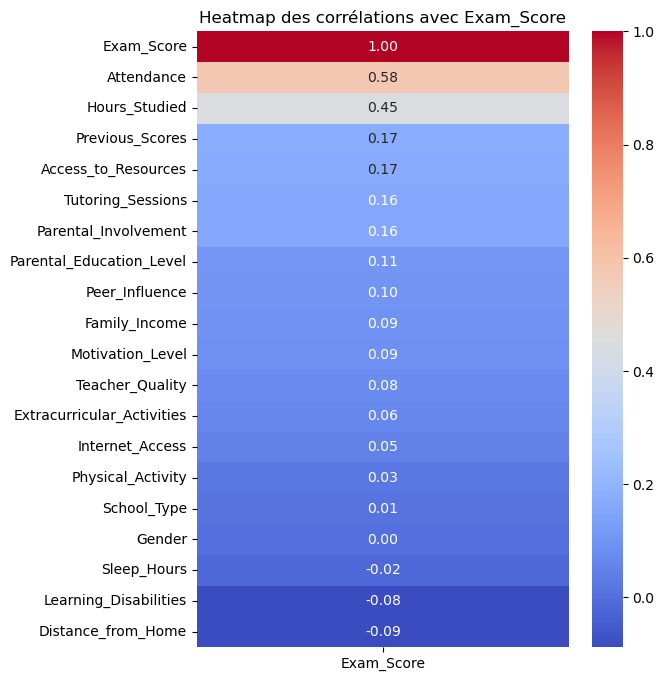

In [12]:
df2.corr()
target_col = 'Exam_Score'
correlations = df2.corr()[[target_col]].sort_values(by=target_col, ascending=False)
plt.figure(figsize=(6, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title(f"Heatmap des corrélations avec {target_col}")
plt.show()

In [19]:
df2.reset_index()

,index,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,...,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,0,23,84,0,2,0,7,73,0,1,...,0,1,0,2,3,0,0,0,1,67
1,1,19,64,0,1,0,8,59,0,1,...,1,1,0,0,4,0,1,1,2,61
2,2,24,98,1,1,1,7,91,1,1,...,1,1,0,1,4,0,2,0,1,74
3,3,29,89,0,1,1,8,98,1,1,...,1,1,0,0,4,0,0,1,1,71
4,4,19,92,1,1,1,6,65,1,1,...,1,2,0,1,4,0,1,0,2,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6373,6602,25,69,2,1,0,7,76,1,1,...,2,1,0,2,2,0,0,0,2,68
6374,6603,23,76,2,1,0,8,81,1,1,...,0,2,0,2,2,0,0,0,2,69
6375,6604,20,90,1,0,1,6,65,0,1,...,0,1,0,0,2,0,2,0,2,68
6376,6605,10,86,2,2,1,6,91,2,1,...,0,1,1,2,3,0,0,2,2,68


In [13]:
df2.to_parquet('student_clean.parquet')

In [20]:
df2.to_csv('student_clean.csv',index=True)

In [15]:
df.isna().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64